# Run on Colab Notebook


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from ydata_profiling import ProfileReport


In [26]:
import tensorflow
import keras

In [3]:
!pip install tensorflow

In [5]:
!pip install keras


In [2]:
!pip install ucimlrepo

In [6]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets



# metadata
metadata = energy_efficiency.metadata


# variable information
variables = energy_efficiency.variables



In [7]:
metadata

{'uci_id': 242,
 'name': 'Energy efficiency',
 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency',
 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv',
 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.',
 'area': 'Computer Science',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 768,
 'num_features': 8,
 'feature_types': ['Integer', 'Real'],
 'demographics': [],
 'target_col': ['Y1', 'Y2'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2012,
 'last_updated': 'Sat Jan 27 2024',
 'dataset_doi': '10.24432/C51307',
 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'],
 'intro_paper': {'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning 

In [8]:
variables

,name,role,type,demographic,description,units,missing_values
0,X1,Feature,Continuous,None,Relative Compactness,None,no
1,X2,Feature,Continuous,None,Surface Area,None,no
2,X3,Feature,Continuous,None,Wall Area,None,no
3,X4,Feature,Continuous,None,Roof Area,None,no
4,X5,Feature,Continuous,None,Overall Height,None,no
5,X6,Feature,Integer,None,Orientation,None,no
6,X7,Feature,Continuous,None,Glazing Area,None,no
7,X8,Feature,Integer,None,Glazing Area Distribution,None,no
8,Y1,Target,Continuous,None,Heating Load,None,no
9,Y2,Target,Continuous,None,Cooling Load,None,no


In [9]:
X.shape

(768, 8)

In [10]:
y.shape

(768, 2)

In [11]:
X.head(15)

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0


In [12]:
y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [15]:
# prompt: combining all features into one ste of dataframe, both X and Y

df = pd.concat([X, y], axis=1)
df.head(20)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97


In [16]:
X=df.iloc[:,:-2] ## independent features
y=df.iloc[:,-2:] ## dependent features

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[0.04622245 0.0538927  0.05429745 0.09279507 0.66899738 0.00558595
 0.06737445 0.01083455]


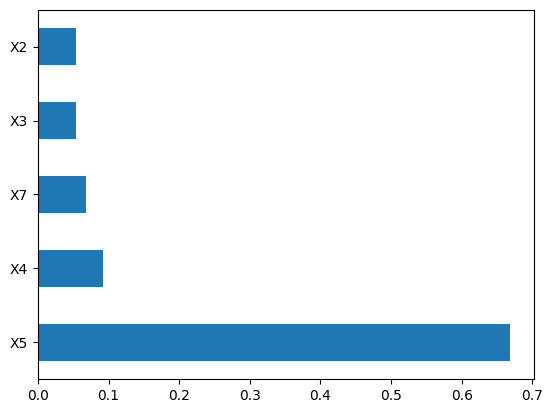

In [19]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, Dropout


In [33]:
from keras.models import Sequential
from keras.layers import Dense

# Assuming you have two target features (Y1 and Y2)
output_nodes = 2

NN_model = Sequential()

# Input Layer
NN_model.add(Dense(128, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))

# Hidden Layers
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# Output Layer
NN_model.add(Dense(output_nodes, kernel_initializer='normal', activation='linear'))

# Compile the network
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history = NN_model.fit(X_train, [y_train['Y1'], y_train['Y2']], validation_split=0.33, batch_size=10, epochs=100)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1152      
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 2)                 514       
                                                                 
Total params: 166274 (649.51 KB)
Trainable params: 166274 (649.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
42

In [39]:
prediction=NN_model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [40]:
print(type(prediction))

<class 'numpy.ndarray'>


In [35]:
y_test

,Y1,Y2
661,15.18,17.63
122,10.32,13.57
113,37.26,34.62
14,16.95,21.16
529,32.26,33.34
...,...,...
476,14.33,15.41
482,28.15,30.00
230,11.33,15.00
527,13.86,14.75


<ipython-input-41-92417d068a2b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test['Y1'].values.reshape(-1, 1) - prediction_Y1, label='Y1 Residuals')


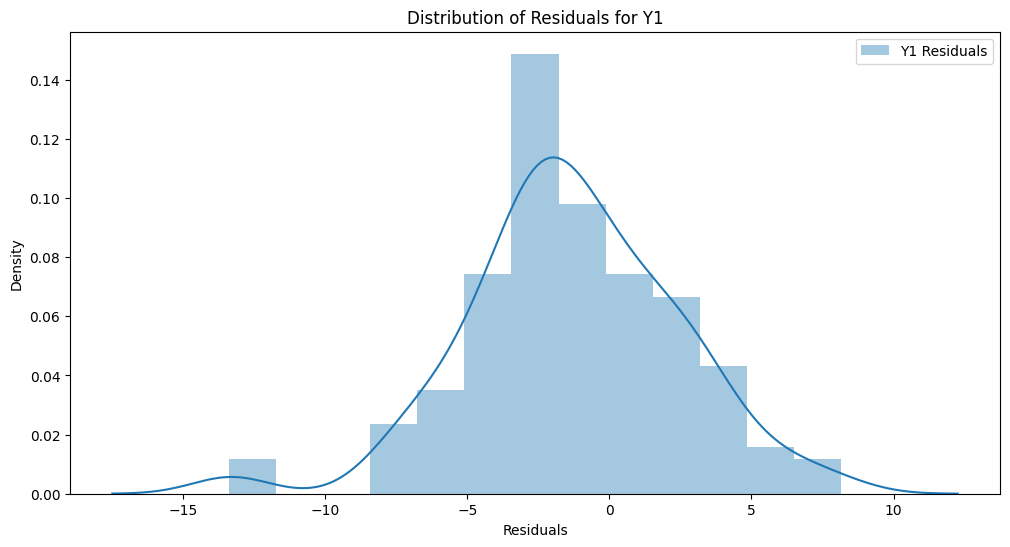

<ipython-input-41-92417d068a2b>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test['Y2'].values.reshape(-1, 1) - prediction_Y2, label='Y2 Residuals')


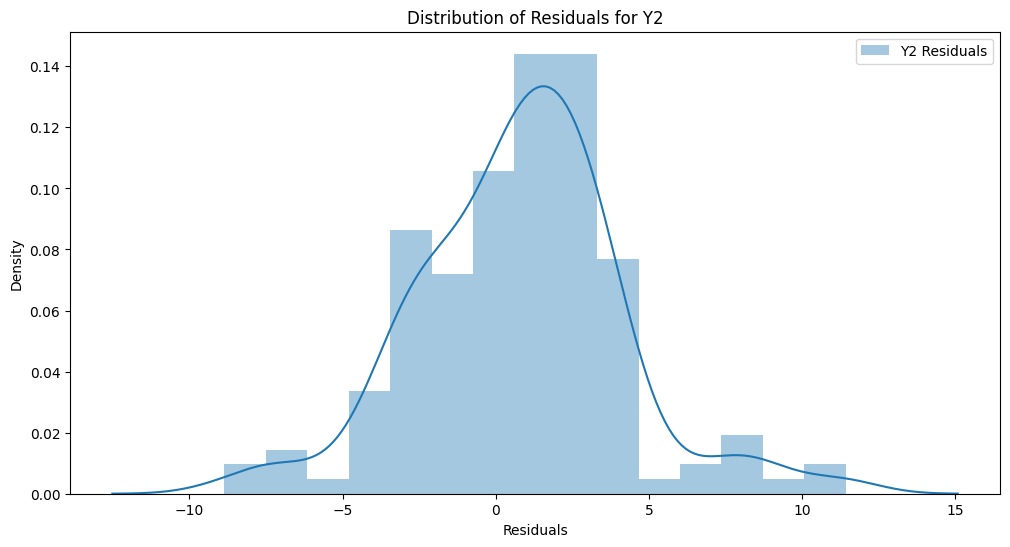

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming prediction is a DataFrame with two columns 'Y1' and 'Y2'
prediction_Y1 = prediction[:, 0].reshape(-1, 1)  # Assuming Y1 values are in the first column
prediction_Y2 = prediction[:, 1].reshape(-1, 1)  # Assuming Y2 values are in the second column


# Plotting distribution for Y1
plt.figure(figsize=(12, 6))
sns.distplot(y_test['Y1'].values.reshape(-1, 1) - prediction_Y1, label='Y1 Residuals')
plt.title('Distribution of Residuals for Y1')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()

# Plotting distribution for Y2
plt.figure(figsize=(12, 6))
sns.distplot(y_test['Y2'].values.reshape(-1, 1) - prediction_Y2, label='Y2 Residuals')
plt.title('Distribution of Residuals for Y2')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.show()


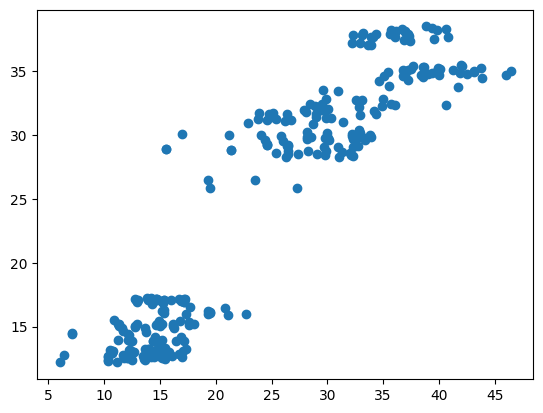

In [42]:
plt.scatter(y_test,prediction)

In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2.8630120263780876
MSE: 13.663735970393716
RMSE: 3.6964491029085895


In [46]:
import pickle
# open a file, where you ant to store the data
file = open('ANN_model.pkl', 'wb')

# dump information to that file
pickle.dump(NN_model, file)